In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('customer_churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and number of total charges are recorded

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isna().sum().sum()

np.int64(0)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df['customerID'].duplicated().sum()

np.int64(0)

In [18]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)


#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

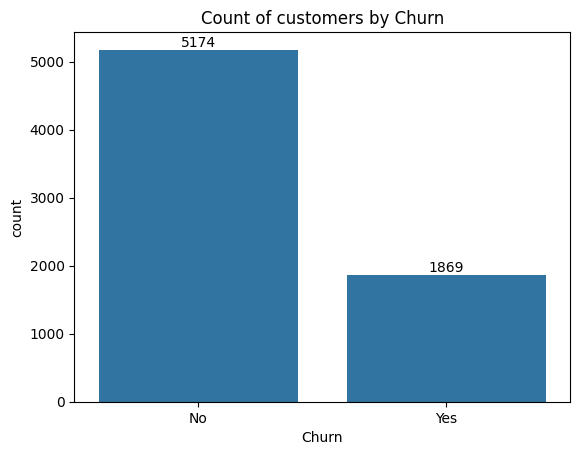

In [27]:
ax = sns.countplot(x = 'Churn' , data = df)

ax.bar_label(ax.containers[0])
plt.title('Count of customers by Churn')
plt.show()

In [24]:
gb = df.groupby('Churn').agg({'Churn': 'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


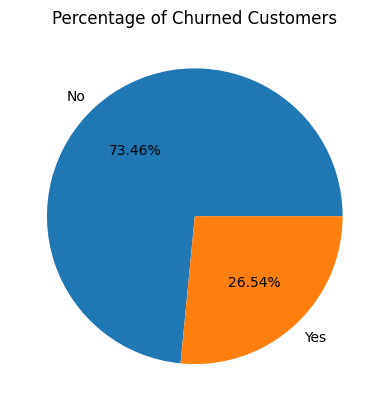

In [28]:
plt.pie(gb['Churn'] , labels = gb.index, autopct = '%1.2f%%' )
plt.title('Percentage of Churned Customers')
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out
#now let's explore the reason behind it

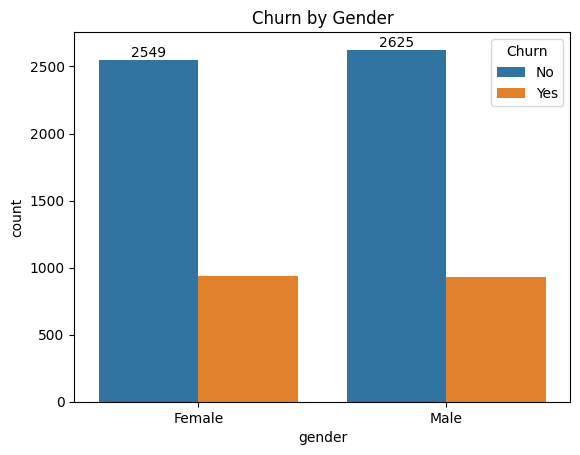

In [33]:
ax = sns.countplot(x = 'gender' , data = df , hue = 'Churn')

ax.bar_label(ax.containers[0])
plt.title('Churn by Gender')
plt.show()

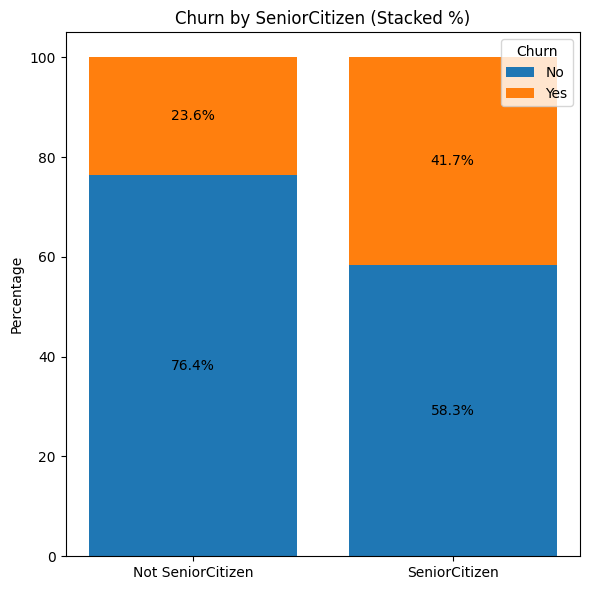

In [39]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

#Calculate percentages
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

#  Plot using matplotlib
fig, ax = plt.subplots(figsize=(6,6))

#Plot stacked bars
bottom = [0] * len(df_percent)
for churn_status in df_percent.columns:
    ax.bar(df_percent.index, df_percent[churn_status], bottom=bottom, label=churn_status)

    # Add labels on each segment
    for i, val in enumerate(df_percent[churn_status]):
        if val > 0:
            ax.text(i, bottom[i] + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10)
    bottom = [i + j for i, j in zip(bottom, df_percent[churn_status])]

# Final touches
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not SeniorCitizen', 'SeniorCitizen'])
ax.set_ylabel('Percentage')
ax.set_title('Churn by SeniorCitizen (Stacked %)')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

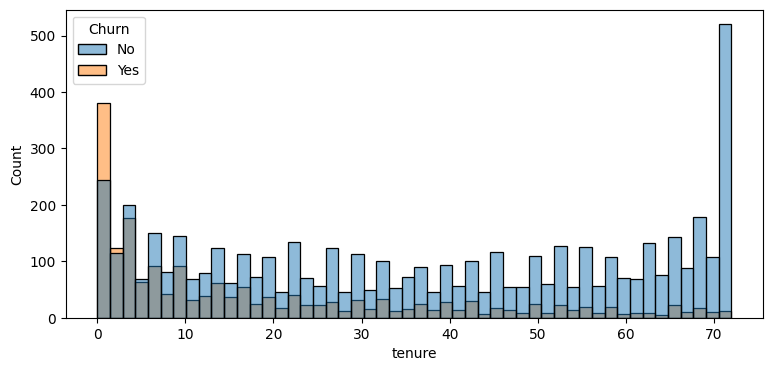

In [41]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure' , data = df , bins = 50 , hue  = 'Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned out

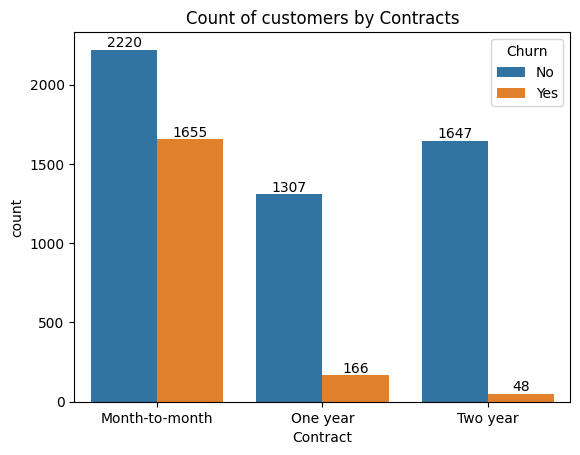

In [50]:
ax = sns.countplot(x = 'Contract' , data = df , hue = 'Churn' )

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of customers by Contracts')
plt.show()

#people who have month to month contract are likely to chrun then from those who have 1 or 2 years of contract

In [52]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

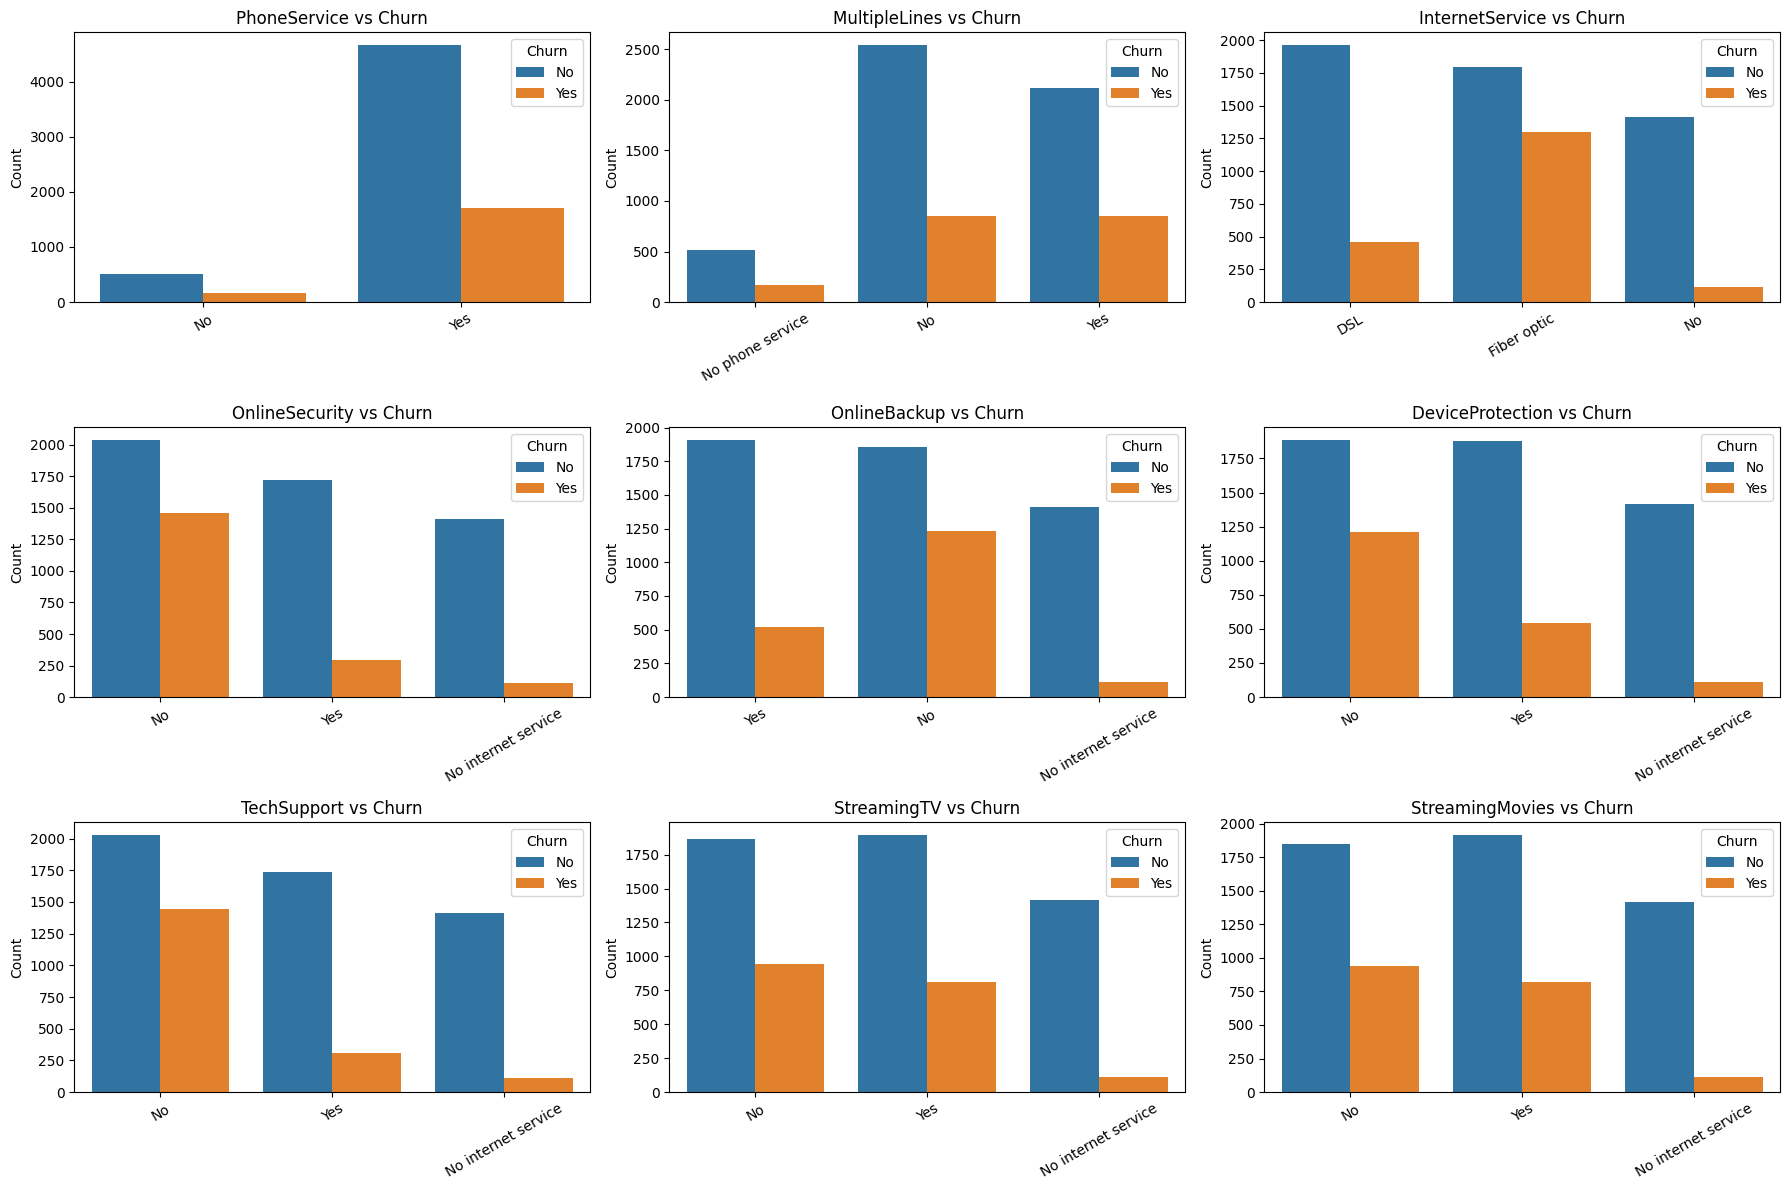

In [53]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

# Set the layout for subplots
n_cols = 3  # 3 plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()  # flatten in case it's a 2D array

# Loop through the columns and plot each
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Churn', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title='Churn')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Improve spacing
plt.tight_layout()
plt.show()

#The visualization shows how customer churn varies across different telecom services like PhoneService, InternetService, and StreamingTV. Each subplot compares the number of churned vs. retained customers for each service type. This helps identify which services are more associated with customer churn.

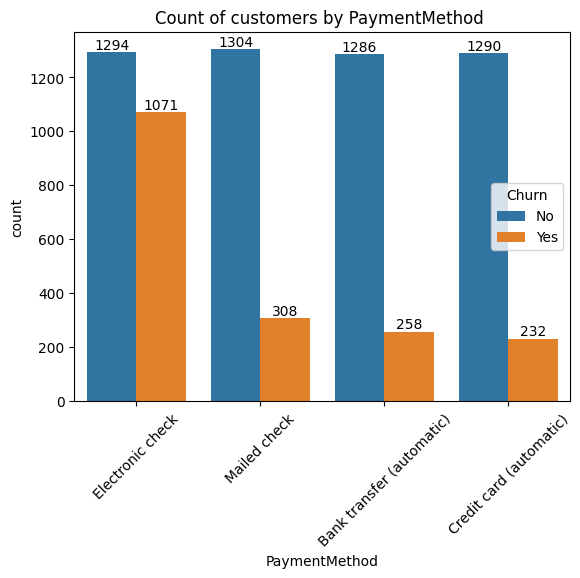

In [57]:
ax = sns.countplot(x = 'PaymentMethod' , data = df , hue = 'Churn' )

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of customers by PaymentMethod ')
plt.xticks(rotation = 45)
plt.show()

#customers is likely to churn when he is using electronic check as a payment method